In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANELS = 3
EPOCHS = 5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
claa_names = dataset.class_names

claa_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 2 2 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0]


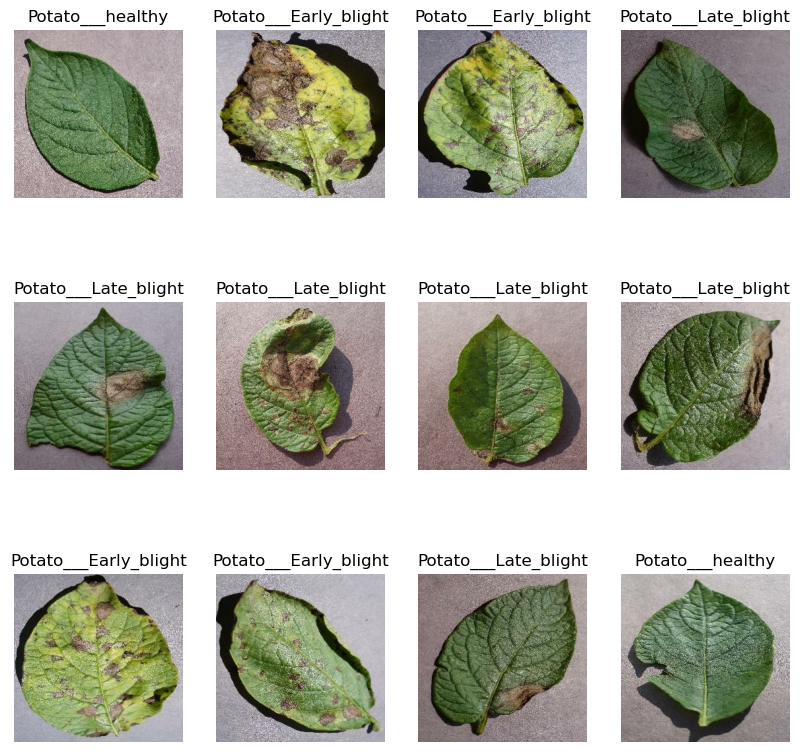

In [7]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(claa_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test 

In [9]:
training_size = 0.8
len(dataset)* training_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)

len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)* val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dateset_partition_tf(ds, train_split= 0.8, test_split = 0.1, val_split = 0.1, shuffle= True, shuffle_size=10000 ):
    ds_size =len(ds)

    if shuffle:
        ds= ds.shuffle(shuffle_size, seed = 12)

    train_size = int( train_split* ds_size)
    val_size = int( val_split* ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds


In [16]:
train_ds, val_ds, test_ds = get_dateset_partition_tf(dataset)

len(train_ds)

54

In [17]:
train_ds= train_ds.cache().shuffle(1000).prefetch( buffer_size= tf.data.AUTOTUNE)
val_ds= train_ds.cache().shuffle(1000).prefetch( buffer_size= tf.data.AUTOTUNE)
test_ds= train_ds.cache().shuffle(1000).prefetch( buffer_size= tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [22]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose= 1,
    validation_data = val_ds
)

Epoch 1/5


54/54 [==============================] - 96s 2s/step - loss: 0.8748 - accuracy: 0.5249 - val_loss: 0.8024 - val_accuracy: 0.6591
Epoch 2/5
54/54 [==============================] - 120s 2s/step - loss: 0.6799 - accuracy: 0.6817 - val_loss: 0.6445 - val_accuracy: 0.6840
Epoch 3/5
54/54 [==============================] - 137s 3s/step - loss: 0.4734 - accuracy: 0.7899 - val_loss: 0.3225 - val_accuracy: 0.8478
Epoch 4/5
54/54 [==============================] - 137s 3s/step - loss: 0.3369 - accuracy: 0.8663 - val_loss: 0.6023 - val_accuracy: 0.7315
Epoch 5/5
54/54 [==============================] - 121s 2s/step - loss: 0.2678 - accuracy: 0.8993 - val_loss: 0.5083 - val_accuracy: 0.8646


In [24]:
score = model.evaluate(test_ds)

54/54 [==============================] - 19s 353ms/step - loss: 0.5083 - accuracy: 0.8646


In [25]:
score

[0.5083377361297607, 0.8645833134651184]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
len(history.history['accuracy'])

5

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


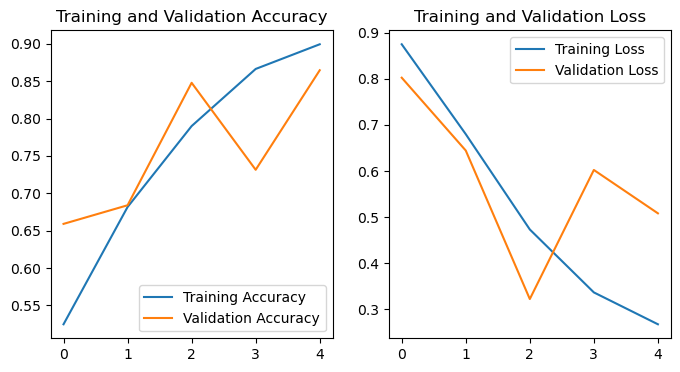

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
first image actual label: Potato___Late_blight
1/1 [==============================] - 1s 584ms/step
 predicted result Potato___Late_blight


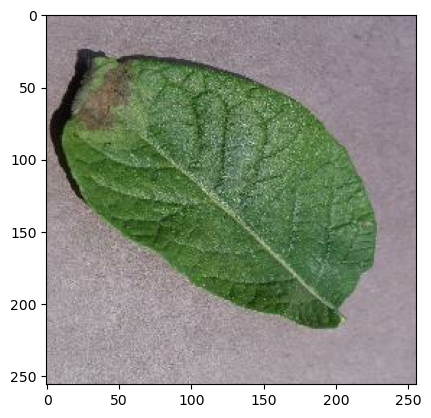

In [32]:
import numpy as np 

for image_batch , label_batch in test_ds.take(1):
    
    firstimage = image_batch[0].numpy().astype('uint8')
    firstlabel =  label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(firstimage)
    print('first image actual label:',  claa_names[firstlabel])

    batch_prediction = model.predict(image_batch)
    print (  ' predicted result',claa_names[np.argmax(batch_prediction[0])])




import numpy as np 
np.argmax([9.5360100e-01, 4.6376087e-02 ,2.2877124e-05])

In [33]:
def predict( model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)  #create a batch

    prediction= model.predict( img_array)

    predicted_class = claa_names[np.argmax(batch_prediction[0])]
    confidence = round( 100 * np.max(prediction[0]), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 50ms/step


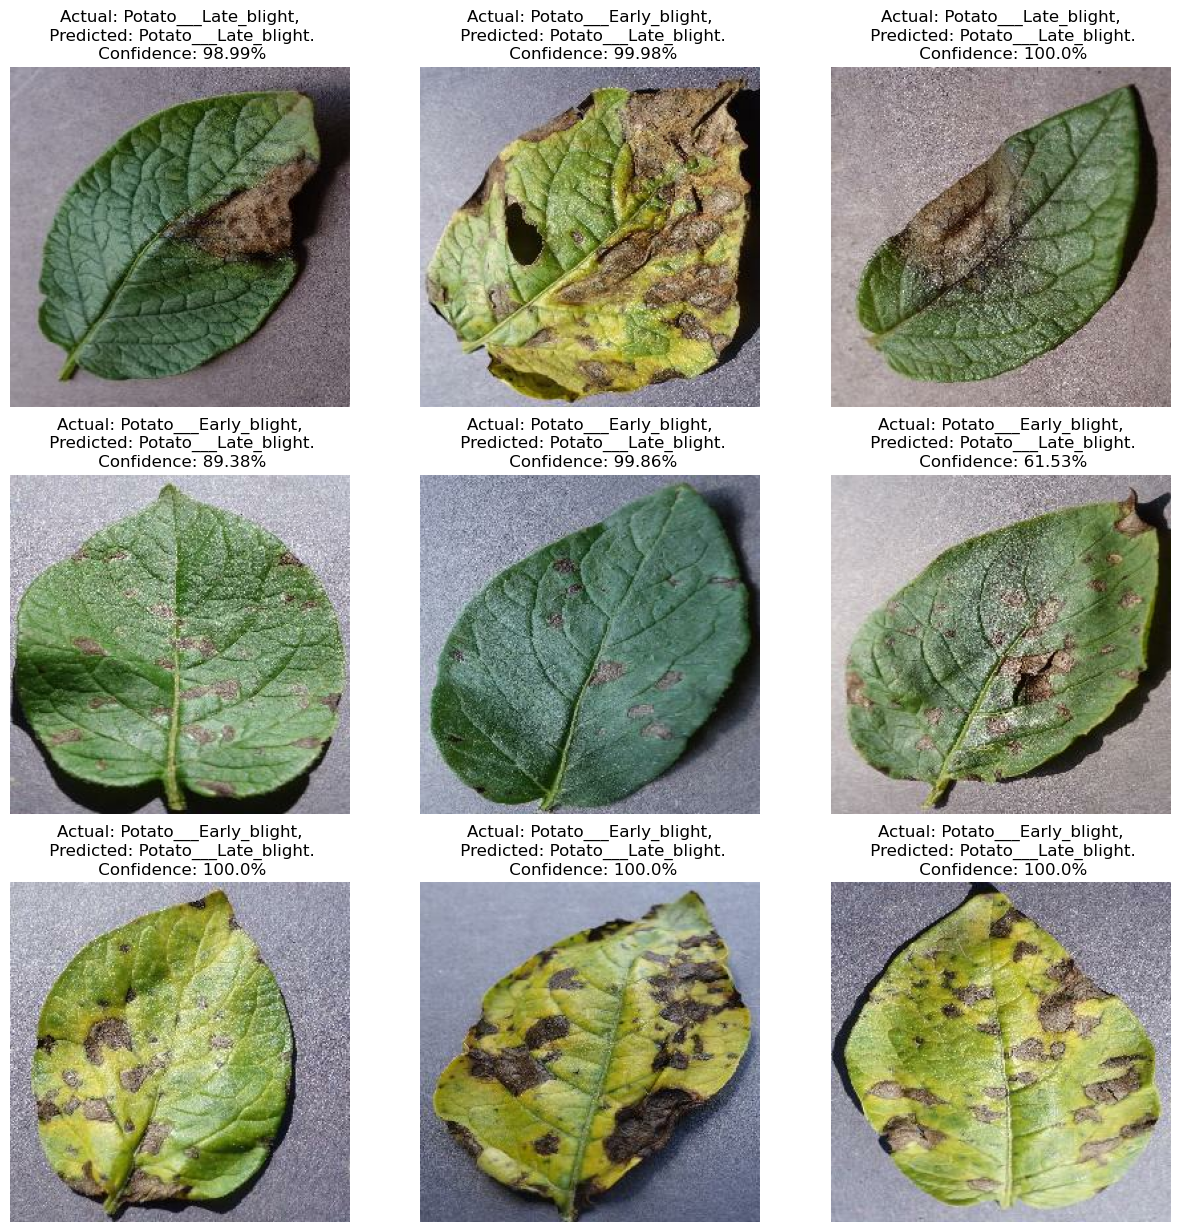

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = claa_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os 

os.listdir('../saved_models')

['1', '2']

In [39]:
model_version =1 
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [40]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [41]:
import tensorflow as tf
print(tf.__version__)

2.15.0
